For Text Mining assignment
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

## Extract review of redmi note 11 from amazon

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
#function to get soup from url 
def get_soup(url):
    resp = requests.get(url)
    print(resp.status_code)
    soup = BeautifulSoup(resp.text,"html.parser")
    return soup

In [4]:
# function to get reviews
reviewlist = []
def get_reviews (soup):
    reviews = soup.find_all('div',{"data-hook":'review'})
    try:
        for item in reviews:
            review={
            'rating':float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars',''.strip())),   
            'title':item.find('a',{'data-hook':'review-title'}).text.strip(),
            'Review_data':item.find('span',{'data-hook':'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass   

In [5]:
# loop for accessing multiple pages
for x in range(1,1000):
    soup = get_soup(f'https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBXK96/\
                    ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
   
    get_reviews(soup)
    
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break 

200
200
200
200
503
200
503
503
200
200
200
200
200
200
200
200
200
503
200
200
200
200
200
200
503
200
200
200
200
200
200
200
200
200
200
200
503
200
200
200
200
200
503
200
200
200
200
200
503
200
200
200
200
200
200
200
200
503
200
200
200
200
200
503
200
200
503
200
200
200
200
200
200
200
200
503
200
503
200
503
200
200
200
200
200
200
200
200
503
200
200
200
503
503
200
200
200
200
200
200
503
200
200
200
503
200
200
503
200
200
200
200
503
200
200
503
503
200
200
503
200
200
200
200
200
200
200
200
200
200
200
200
200
503
503
503
200
200
200
200
200
503
200
200
200
200
200
200
200
503
200
200
200
200
200
200
200
200
503
200
200
503
503
200
200
200
200
503
200
503
200
200
200
200
503
200
200
503
200
200
200
200
200
503
200
200
200
200
200
503
200
200
200
200
200
200
200
200
503
200
200
200
200
200
200
200
503
200
200
200
200
200
200
200
503
200
200
200
200
200
200
200
503
200
200
200
200
200
200
200
200
200
200
200
200
503
200
503
200
200
200
200
200
200
200
503
200
503
200
200


In [6]:
df = pd.DataFrame(reviewlist)
df

rating                                              title  \
0        2.0                               Not worth buying it.   
1        5.0                                    Budget Friendly   
2        4.0                                 Good but not great   
3        2.0  Selfi camra so bad.... WhatsApp video quality ...   
4        1.0                              Blaming in Chip level   
...      ...                                                ...   
3065     2.0                                           Not Good   
3066     5.0                                               GOOD   
3067     5.0                                      Good features   
3068     4.0                                               Nice   
3069     4.0                                   Not as expected!   

                                            Review_data  
0     I had redmi 6 Pro and exchanged it for Redmi 1...  
1     For 12500/- price it's a good picScreen Amoled...  
2     Pros- Amoled Screen, Battery easily lasts a da...  
3                                                        
4     The media could not be loaded.\n              ...  
...                                                 ...  
3065  Cons:1.Processer is Not Good2.Internal Storage...  
3066  Phone is Good. Overall ok. Previously i was us...  
3067              Good features and valuable smartphone  
3068    Yeah a decent smartphone but camera is too dull  
3069                Don't buy this phone at this price.  

[3070 rows x 3 columns]

In [7]:
# Downlode the DataFrame with csv formate
df.to_csv('redmi_note_11.csv')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spacy import displacy
from scipy import spatial
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
# Load the data
data=pd.read_csv('redmi_note_11.csv')
data.head()

Unnamed: 0  rating                                              title  \
0           0     2.0                               Not worth buying it.   
1           1     5.0                                    Budget Friendly   
2           2     4.0                                 Good but not great   
3           3     2.0  Selfi camra so bad.... WhatsApp video quality ...   
4           4     1.0                              Blaming in Chip level   

                                         Review_data  
0  I had redmi 6 Pro and exchanged it for Redmi 1...  
1  For 12500/- price it's a good picScreen Amoled...  
2  Pros- Amoled Screen, Battery easily lasts a da...  
3                                                NaN  
4  The media could not be loaded.\n              ...

In [10]:
# Droping column which is not requried
data.drop(['Unnamed: 0','title'],inplace=True,axis=1)
data.head()

rating                                        Review_data
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...
1     5.0  For 12500/- price it's a good picScreen Amoled...
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...
3     2.0                                                NaN
4     1.0  The media could not be loaded.\n              ...

## EDA

In [11]:
# Datatypes
data.dtypes

rating         float64
Review_data     object
dtype: object

In [12]:
# Checking for missing values
data.isnull().sum()

rating          0
Review_data    73
dtype: int64

In [13]:
# droping null values
data=data.dropna()
data.shape

(2997, 2)

### Data pre-processing

In [14]:
#removing @name 
data_new=data.copy()
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 
data_new['clean_review'] = np.vectorize(remove_pattern)(data_new['Review_data'], "@[\w]*")
data_new.head(10)

rating                                        Review_data  \
0      2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1      5.0  For 12500/- price it's a good picScreen Amoled...   
2      4.0  Pros- Amoled Screen, Battery easily lasts a da...   
4      1.0  The media could not be loaded.\n              ...   
5      4.0  Redmi Note 11 is great piece, but automatic ca...   
6      5.0  The media could not be loaded.\n              ...   
7      2.0  This is not an upgaradation of previous models...   
8      1.0  Worst phone ever in16k no 4k video recording w...   
9      4.0  Really good device with great looks and screen...   
10     1.0  The media could not be loaded.\n              ...   

                                         clean_review  
0   I had redmi 6 Pro and exchanged it for Redmi 1...  
1   For 12500/- price it's a good picScreen Amoled...  
2   Pros- Amoled Screen, Battery easily lasts a da...  
4   The media could not be loaded.\n              ...  
5   Redmi Note 11 is great piece, but automatic ca...  
6   The media could not be loaded.\n              ...  
7   This is not an upgaradation of previous models...  
8   Worst phone ever in16k no 4k video recording w...  
9   Really good device with great looks and screen...  
10  The media could not be loaded.\n              ...

In [15]:
# Removing of link present in reviews
cleaned_data_new = []

for index, row in data_new.iterrows():
    links = [word for word in row.clean_review.split() if 'http' not in word]
    cleaned_data_new.append(' '.join(links))

data_new['clean_review'] = cleaned_data_new
data_new.head(10)

rating                                        Review_data  \
0      2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1      5.0  For 12500/- price it's a good picScreen Amoled...   
2      4.0  Pros- Amoled Screen, Battery easily lasts a da...   
4      1.0  The media could not be loaded.\n              ...   
5      4.0  Redmi Note 11 is great piece, but automatic ca...   
6      5.0  The media could not be loaded.\n              ...   
7      2.0  This is not an upgaradation of previous models...   
8      1.0  Worst phone ever in16k no 4k video recording w...   
9      4.0  Really good device with great looks and screen...   
10     1.0  The media could not be loaded.\n              ...   

                                         clean_review  
0   I had redmi 6 Pro and exchanged it for Redmi 1...  
1   For 12500/- price it's a good picScreen Amoled...  
2   Pros- Amoled Screen, Battery easily lasts a da...  
4   The media could not be loaded. Hello all,Am ne...  
5   Redmi Note 11 is great piece, but automatic ca...  
6   The media could not be loaded. A good fone in ...  
7   This is not an upgaradation of previous models...  
8   Worst phone ever in16k no 4k video recording w...  
9   Really good device with great looks and screen...  
10  The media could not be loaded. wifi is not det...

In [16]:
# removing data_new with empty data_new
data_new = data_new[data_new['clean_review']!='']
data_new.shape

(2997, 3)

In [17]:
# Droping of duplicates row
data_new.drop_duplicates(subset=['clean_review'], keep=False)
data_new = data_new.reset_index(drop=True)
data_new.shape

(2997, 3)

In [18]:
#Removing Punctuations, Numbers, Special characters and convert in lower case
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
data_new['clean_review'] = data_new['clean_review'].apply(lambda x: clean_text(x))
data_new.head(10)

rating                                        Review_data  \
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1     5.0  For 12500/- price it's a good picScreen Amoled...   
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...   
3     1.0  The media could not be loaded.\n              ...   
4     4.0  Redmi Note 11 is great piece, but automatic ca...   
5     5.0  The media could not be loaded.\n              ...   
6     2.0  This is not an upgaradation of previous models...   
7     1.0  Worst phone ever in16k no 4k video recording w...   
8     4.0  Really good device with great looks and screen...   
9     1.0  The media could not be loaded.\n              ...   

                                        clean_review  
0  i had redmi  pro and exchanged it for redmi  i...  
1  for  price its a good picscreen amoled    desi...  
2  pros amoled screen battery easily lasts a day ...  
3  the media could not be loaded hello allam new ...  
4  redmi note  is great piece but automatic call ...  
5  the media could not be loaded a good fone in t...  
6  this is not an upgaradation of previous models...  
7  worst phone ever  no  video recording worst ca...  
8  really good device with great looks and screen...  
9  the media could not be loaded wifi is not dete...

In [19]:
# Removing emoji from reviews
def remove_emoji(text):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF" 
                         u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251""]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data_new['clean_review'] = data_new['clean_review'].apply(lambda x: remove_emoji(x))
data_new.head(10)

rating                                        Review_data  \
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1     5.0  For 12500/- price it's a good picScreen Amoled...   
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...   
3     1.0  The media could not be loaded.\n              ...   
4     4.0  Redmi Note 11 is great piece, but automatic ca...   
5     5.0  The media could not be loaded.\n              ...   
6     2.0  This is not an upgaradation of previous models...   
7     1.0  Worst phone ever in16k no 4k video recording w...   
8     4.0  Really good device with great looks and screen...   
9     1.0  The media could not be loaded.\n              ...   

                                        clean_review  
0  i had redmi  pro and exchanged it for redmi  i...  
1  for  price its a good picscreen amoled    desi...  
2  pros amoled screen battery easily lasts a day ...  
3  the media could not be loaded hello allam new ...  
4  redmi note  is great piece but automatic call ...  
5  the media could not be loaded a good fone in t...  
6  this is not an upgaradation of previous models...  
7  worst phone ever  no  video recording worst ca...  
8  really good device with great looks and screen...  
9  the media could not be loaded wifi is not dete...

In [20]:
#Removing stop words
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in data_new.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.clean_review.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
data_new['absolute_data'] = cleaned_tweets
data_new.head(10)

rating                                        Review_data  \
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1     5.0  For 12500/- price it's a good picScreen Amoled...   
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...   
3     1.0  The media could not be loaded.\n              ...   
4     4.0  Redmi Note 11 is great piece, but automatic ca...   
5     5.0  The media could not be loaded.\n              ...   
6     2.0  This is not an upgaradation of previous models...   
7     1.0  Worst phone ever in16k no 4k video recording w...   
8     4.0  Really good device with great looks and screen...   
9     1.0  The media could not be loaded.\n              ...   

                                        clean_review  \
0  i had redmi  pro and exchanged it for redmi  i...   
1  for  price its a good picscreen amoled    desi...   
2  pros amoled screen battery easily lasts a day ...   
3  the media could not be loaded hello allam new ...   
4  redmi note  is great piece but automatic call ...   
5  the media could not be loaded a good fone in t...   
6  this is not an upgaradation of previous models...   
7  worst phone ever  no  video recording worst ca...   
8  really good device with great looks and screen...   
9  the media could not be loaded wifi is not dete...   

                                       absolute_data  
0  redmi pro exchanged redmi im impressed phonedi...  
1  price good picscreen amoled design expect pric...  
2  pros amoled screen battery easily lasts day da...  
3  media could loaded hello allam new redminote y...  
4  redmi note great piece automatic call recordin...  
5  media could loaded good fone price range displ...  
6  upgaradation previous models like note note di...  
7  worst phone ever video recording worst camera ...  
8  really good device great looks screen camera q...  
9  media could loaded wifi detecting automatic wi...

In [21]:
# Tokenize absolute_data
tokenized_data = data_new['absolute_data'].apply(lambda x: x.split())
tokenized_data.head(10)

0    [redmi, pro, exchanged, redmi, im, impressed, ...
1    [price, good, picscreen, amoled, design, expec...
2    [pros, amoled, screen, battery, easily, lasts,...
3    [media, could, loaded, hello, allam, new, redm...
4    [redmi, note, great, piece, automatic, call, r...
5    [media, could, loaded, good, fone, price, rang...
6    [upgaradation, previous, models, like, note, n...
7    [worst, phone, ever, video, recording, worst, ...
8    [really, good, device, great, looks, screen, c...
9    [media, could, loaded, wifi, detecting, automa...
Name: absolute_data, dtype: object

In [22]:
#Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
nltk.download('wordnet')


tokenized_data = tokenized_data.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_data.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [redmi, pro, exchanged, redmi, im, impressed, ...
1    [price, good, picscreen, amoled, design, expec...
2    [pro, amoled, screen, battery, easily, last, d...
3    [medium, could, loaded, hello, allam, new, red...
4    [redmi, note, great, piece, automatic, call, r...
5    [medium, could, loaded, good, fone, price, ran...
6    [upgaradation, previous, model, like, note, no...
7    [worst, phone, ever, video, recording, worst, ...
8    [really, good, device, great, look, screen, ca...
9    [medium, could, loaded, wifi, detecting, autom...
Name: absolute_data, dtype: object

In [23]:
#Joining all tokens into sentences
for i, tokens in enumerate(tokenized_data):
    tokenized_data[i] = " ".join(tokens)

data_new['absolute_data'] = tokenized_data
data_new.head(10)

rating                                        Review_data  \
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1     5.0  For 12500/- price it's a good picScreen Amoled...   
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...   
3     1.0  The media could not be loaded.\n              ...   
4     4.0  Redmi Note 11 is great piece, but automatic ca...   
5     5.0  The media could not be loaded.\n              ...   
6     2.0  This is not an upgaradation of previous models...   
7     1.0  Worst phone ever in16k no 4k video recording w...   
8     4.0  Really good device with great looks and screen...   
9     1.0  The media could not be loaded.\n              ...   

                                        clean_review  \
0  i had redmi  pro and exchanged it for redmi  i...   
1  for  price its a good picscreen amoled    desi...   
2  pros amoled screen battery easily lasts a day ...   
3  the media could not be loaded hello allam new ...   
4  redmi note  is great piece but automatic call ...   
5  the media could not be loaded a good fone in t...   
6  this is not an upgaradation of previous models...   
7  worst phone ever  no  video recording worst ca...   
8  really good device with great looks and screen...   
9  the media could not be loaded wifi is not dete...   

                                       absolute_data  
0  redmi pro exchanged redmi im impressed phonedi...  
1  price good picscreen amoled design expect pric...  
2  pro amoled screen battery easily last day day ...  
3  medium could loaded hello allam new redminote ...  
4  redmi note great piece automatic call recordin...  
5  medium could loaded good fone price range disp...  
6  upgaradation previous model like note note dis...  
7  worst phone ever video recording worst camera ...  
8  really good device great look screen camera qu...  
9  medium could loaded wifi detecting automatic w...

## feature extraction

In [24]:
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(data_new['absolute_data'])
print(cv.get_feature_names()[100:200])

['akar', 'al', 'alarm', 'alert', 'alexa', 'alla', 'allam', 'allbattery', 'alli', 'allits', 'alll', 'allow', 'allowing', 'allows', 'allrounder', 'allso', 'almost', 'along', 'alot', 'alphabet', 'already', 'alredy', 'alright', 'also', 'alsodont', 'alsohope', 'alsoi', 'alternative', 'although', 'always', 'alwayson', 'amazed', 'amazes', 'amazing', 'amazingauto', 'amazingfast', 'amazingfor', 'amazingly', 'amazingthe', 'amazingusing', 'amazini', 'amazon', 'amazonbattery', 'amazone', 'amazonservice', 'amazonso', 'amazonthis', 'amazonwaste', 'amejig', 'amezon', 'amloed', 'amolad', 'amoled', 'amoledhowever', 'amoledokperformance', 'amoledrest', 'among', 'amount', 'amout', 'amp', 'amzone', 'ana', 'analysis', 'andcharging', 'andi', 'andoid', 'android', 'androiddiplay', 'androidthanks', 'andsound', 'ane', 'angle', 'anglesthese', 'animation', 'animeits', 'ankh', 'announcement', 'annoyancesgps', 'annoying', 'another', 'anouncement', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'an

In [25]:
print(clean_commentscv.toarray()[100:200])
print(clean_commentscv.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2997, 4962)


In [26]:
# n-gram
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(data_new['absolute_data'])

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'amoled', 'app', 'apps', 'average', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'best', 'better', 'budget', 'buy', 'buy phone', 'call', 'camera', 'camera good', 'camera quality', 'charging', 'could', 'could loaded', 'day', 'device', 'display', 'dont', 'dont buy', 'even', 'excellent', 'experience', 'fast', 'feature', 'feel', 'fingerprint', 'front', 'get', 'go', 'good', 'good battery', 'good camera', 'good phone', 'great', 'hai', 'hang', 'hanging', 'issue', 'life', 'light', 'like', 'loaded', 'look', 'low', 'medium', 'medium could', 'medium could loaded', 'mi', 'mobile', 'money', 'month', 'much', 'need', 'nice', 'normal', 'note', 'ok', 'one', 'overall', 'performance', 'phone', 'phone good', 'please', 'poor', 'price', 'price range', 'pro', 'problem', 'processor', 'product', 'quality', 'quality good', 'range', 'really', 'redmi', 'redmi note', 'screen', 'slow', 'sound', 'speaker', 'thing', 'time', 'use', 'using', 'value', 'value money', 'video', 'work', 

In [28]:
# tfidf vectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(data_new['absolute_data'])
print(tfidfv_ngram_max_features.get_feature_names())

['able', 'according', 'achha', 'almost', 'also', 'also good', 'always', 'amazing', 'amazon', 'amoled', 'amoled display', 'another', 'app', 'application', 'apps', 'audio', 'auto', 'automatically', 'available', 'average', 'average camera', 'awesome', 'back', 'back camera', 'backup', 'backup good', 'bad', 'bad camera', 'bahut', 'basic', 'battery', 'battery backup', 'battery good', 'battery life', 'battery life good', 'battery performance', 'bekar', 'best', 'best mobile', 'best phone', 'better', 'better camera', 'better phone', 'bhi', 'big', 'bit', 'black', 'bluetooth', 'bought', 'bought phone', 'box', 'brand', 'brightness', 'budget', 'budget phone', 'bug', 'build', 'build quality', 'button', 'buy', 'buy phone', 'buy product', 'buying', 'call', 'call recording', 'calling', 'camara', 'camera', 'camera also', 'camera average', 'camera bad', 'camera good', 'camera ok', 'camera performance', 'camera phone', 'camera poor', 'camera quality', 'camera quality average', 'camera quality bad', 'camer

### Generate wordcloud

In [29]:
clean_review="".join(data_new['absolute_data'])
clean_review[:500]

'redmi pro exchanged redmi im impressed phonedisplay look normal dont think better redmi pro still feel redmi pro screen bestcamera really avg one worth itprev redmi phone really good camera quality goodthis one doesnt fit redmi family though good specification doesnt worthfast charger good charge really fastif need phone go phone review weekreview couple week march doesnt look like amoled display like ordinary onebattery charge really fast withstand dayuse nvr gaming phone using call whatsapp so'

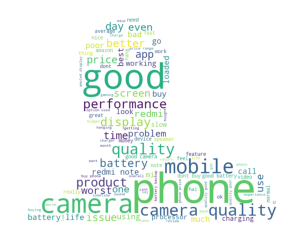

In [30]:
from PIL import Image
maskArray = np.array(Image.open("elon_musk.png"))
cloud = WordCloud(width = 3000, height = 2000,background_color = "white", max_words = 100, mask = maskArray, stopwords = set(STOPWORDS))
cloud.generate(clean_review)
cloud.to_file("wordCloud.png")
plt.axis("off")
plt.imshow(cloud)
plt.show()

## Named Entity Recognition (NER)

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block=clean_review
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

used VERB
ppl PROPN
need VERB
phone NOUN
wiht ADJ
big ADJ
display NOUN
batterycamera NOUN
really ADV
bad ADJ
do AUX
nt PART
know VERB
redmi ADV
like ADP
picture NOUN
look VERB
normal ADJ
outside ADP
good ADJ
sunlight NOUN
tubelight NOUN
could AUX
see VERB
noise NOUN
picture NOUN
happy ADJ
cameraprice NOUN
good ADJ
picscreen NOUN
amoled VERB
design NOUN
expect VERB
price NOUN
brobattery NOUN
backup ADJ
heavy ADJ
game NOUN
upto NOUN
mark NOUN
try VERB
primary ADJ
camera NOUN
make VERB
phone NOUN
cam NOUN
blaster NOUN
unlock NOUN
charging VERB
loved VERB
itbluetooth NOUN
apps PROPN
preloadedi PROPN
felt VERB
laggy ADJ
playing VERB
heavy ADJ
gamesno NOUN
fmannoying VERB
mi NOUN
apps NOUN
mi NOUN
app NOUN
store VERB
annoying ADJ
notification NOUN
recommend VERB
turn NOUN
notificationpro NOUN
amoled VERB
screen NOUN
battery NOUN
easily ADV
last ADJ
day NOUN
day NOUN
n CCONJ
half NOUN
moderate ADJ
usagecharging NOUN
speed NOUN
size NOUN
mobile ADJ
handy ADJ
b NOUN
accessed VERB
though ADV
sin

In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['notificationpro', 'amoled', 'screen', 'battery', 'day', 'day', 'half', 'usagecharging', 'speed', 'size', 'b', 'accessed', 'sd', 'card', 'slotcons', 'camera', 'picture', 'dissapoinment', 'price', 'le', 'considering', 'processormedium', 'loaded', 'redminote', 'yesterday', 'received', 'mobile', 'find', 'observation', 'gaming', 'user', 'preferred', 'chip', 'architecture', 'redmi', 'note', 'chip', 'awareness', 'issue', 'company', 'level', 'returning', 'reference', 'attached', 'screen', 'recorded', 'find', 'mentioned', 'box', 'mobileabout', 'option', 'used', 'chipset', 'waste', 'money', 'budget', 'go', 'note', 'piece', 'call', 'recording', 'option', 'xiaomi', 'updatemedium', 'loaded', 'fone', 'price', 'range', 'camara', 'display', 'gimmick', 'display', 'tun', 'saying', 'display', 'thismiui', 'need', 'update', 'recording', 'provided', 'drawback', 'amoled', 'display', 'note', 'phone', 'recording', 'lack', 'matter', 'providing', 'work', 'forget', 'metro', 'laging', 'heating', 'issue', 'chargi

In [34]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
# viewing top ten results
wd_df[0:10]

word  count
0        phone    967
1       camera    893
2      quality    649
3      battery    367
4      display    245
5        price    232
6          buy    211
7         note    201
8  performance    174
9         life    169

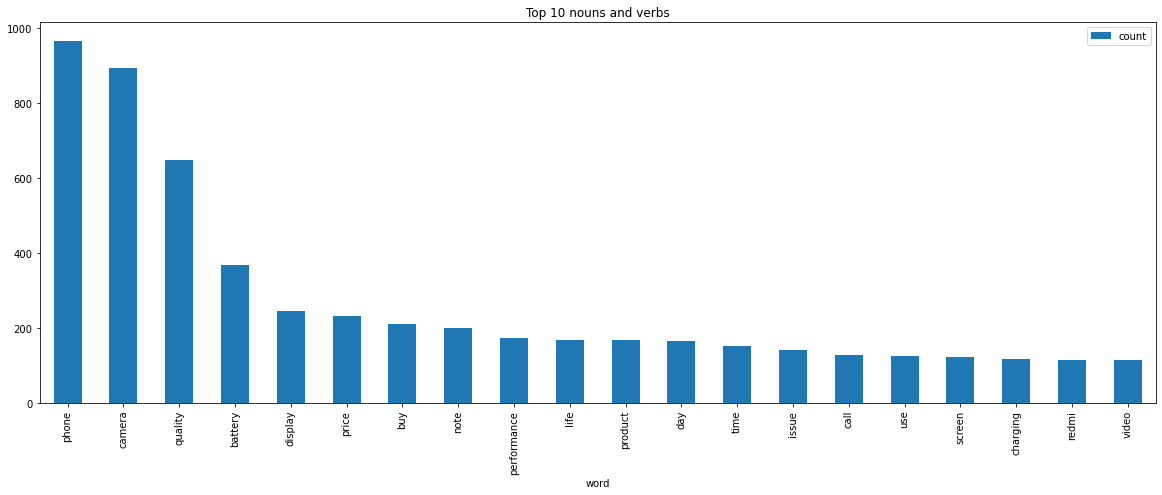

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:20].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs');

## Emotion mining 

In [36]:
#Sementic Analysis
nltk.download('vader_lexicon')
# define function for Textblob 
from textblob import TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
sentiments_using_textblob = data_new.absolute_data.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


absolute_data
pos           2408
neg            589

In [37]:
# define function for NLTK SentimentlntensityAnalyzer
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'
sentiments_using_SIA = data_new.absolute_data.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

absolute_data
pos           2312
neg            685

In [38]:
data_new.absolute_data[5]

'medium could loaded good fone price range displaysound design excellent camara also good always display available always gimmick ten second display tun automaticaly available always saying always display thismiui nothing need update also k recording provided major drawback amoled display even note seven pro old phone fo recording lack g big matter even providing properly net work forget metro laging heating issue charging superb hyper charging good phone normal us gamer iam unable say gaming day use iam satisfied phone'

In [39]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data_new.absolute_data[5])

{'neg': 0.045, 'neu': 0.737, 'pos': 0.218, 'compound': 0.9451}

In [40]:
d_f=pd.DataFrame()
d_f['Text'] = data_new.absolute_data
d_f['scores'] = data_new['absolute_data'].apply(lambda review: sid.polarity_scores(review))
d_f.head()

Text  \
0  redmi pro exchanged redmi im impressed phonedi...   
1  price good picscreen amoled design expect pric...   
2  pro amoled screen battery easily last day day ...   
3  medium could loaded hello allam new redminote ...   
4  redmi note great piece automatic call recordin...   

                                              scores  
0  {'neg': 0.117, 'neu': 0.715, 'pos': 0.168, 'co...  
1  {'neg': 0.053, 'neu': 0.728, 'pos': 0.219, 'co...  
2  {'neg': 0.059, 'neu': 0.873, 'pos': 0.068, 'co...  
3  {'neg': 0.041, 'neu': 0.824, 'pos': 0.135, 'co...  
4  {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...

In [41]:
d_f['compound']  = d_f['scores'].apply(lambda scores: scores['compound'])
d_f.head()

Text  \
0  redmi pro exchanged redmi im impressed phonedi...   
1  price good picscreen amoled design expect pric...   
2  pro amoled screen battery easily last day day ...   
3  medium could loaded hello allam new redminote ...   
4  redmi note great piece automatic call recordin...   

                                              scores  compound  
0  {'neg': 0.117, 'neu': 0.715, 'pos': 0.168, 'co...    0.8621  
1  {'neg': 0.053, 'neu': 0.728, 'pos': 0.219, 'co...    0.8126  
2  {'neg': 0.059, 'neu': 0.873, 'pos': 0.068, 'co...    0.0772  
3  {'neg': 0.041, 'neu': 0.824, 'pos': 0.135, 'co...    0.6597  
4  {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...    0.6249

In [42]:
d_f['sentiment'] = d_f['compound'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<0  else 'Neutral'))
d_f

Text  \
0     redmi pro exchanged redmi im impressed phonedi...   
1     price good picscreen amoled design expect pric...   
2     pro amoled screen battery easily last day day ...   
3     medium could loaded hello allam new redminote ...   
4     redmi note great piece automatic call recordin...   
...                                                 ...   
2992                             storage gb ram missing   
2993  phone good overall ok previously using redmi c...   
2994                   good feature valuable smartphone   
2995                      decent smartphone camera dull   
2996                               dont buy phone price   

                                                 scores  compound sentiment  
0     {'neg': 0.117, 'neu': 0.715, 'pos': 0.168, 'co...    0.8621  Positive  
1     {'neg': 0.053, 'neu': 0.728, 'pos': 0.219, 'co...    0.8126  Positive  
2     {'neg': 0.059, 'neu': 0.873, 'pos': 0.068, 'co...    0.0772  Positive  
3     {'neg': 0.041, 'neu': 0.824, 'pos': 0.135, 'co...    0.6597  Positive  
4     {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...    0.6249  Positive  
...                                                 ...       ...       ...  
2992  {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...   -0.2960  Negative  
2993  {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...    0.7906  Positive  
2994  {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou...    0.7184  Positive  
2995  {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp...   -0.4019  Negative  
2996  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  

[2997 rows x 4 columns]

In [43]:
temp = d_f.groupby('sentiment').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp

sentiment  Text
2  Positive  1825
0  Negative   689
1   Neutral   483

In [44]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
from plotly import graph_objs as go
#Filtering data
positive_review = d_f[d_f["sentiment"]=='Positive'].dropna()
neutral_review = d_f[d_f["sentiment"]=='Neutral'].dropna()
negative_review = d_f[d_f["sentiment"]=='Negative'].dropna()

#custom function for ngram generation 
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart 
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

# Get the bar chart from positive reviews 
freq_dict = defaultdict(int)
for sent in positive_review["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in neutral_review["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

#Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in negative_review["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\Vinay\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<AxesSubplot:xlabel='sentiment', ylabel='count'>

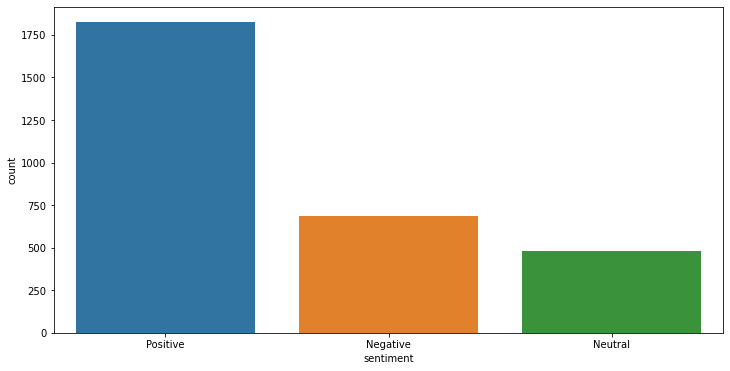

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=d_f)

<AxesSubplot:xlabel='compound', ylabel='Density'>

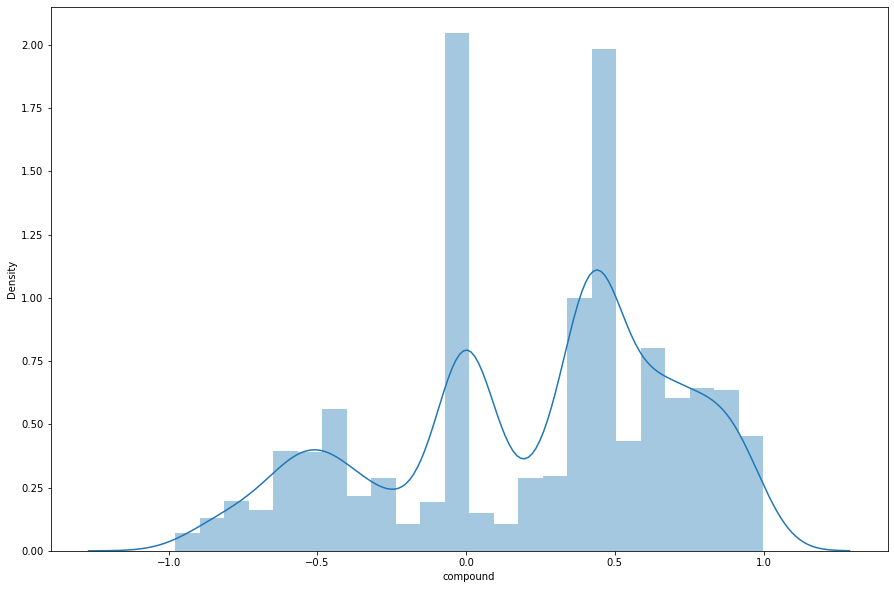

In [46]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(d_f['compound'])

In [47]:
data_new['sentiment'] = sentiments_using_SIA
data_new.head()

rating                                        Review_data  \
0     2.0  I had redmi 6 Pro and exchanged it for Redmi 1...   
1     5.0  For 12500/- price it's a good picScreen Amoled...   
2     4.0  Pros- Amoled Screen, Battery easily lasts a da...   
3     1.0  The media could not be loaded.\n              ...   
4     4.0  Redmi Note 11 is great piece, but automatic ca...   

                                        clean_review  \
0  i had redmi  pro and exchanged it for redmi  i...   
1  for  price its a good picscreen amoled    desi...   
2  pros amoled screen battery easily lasts a day ...   
3  the media could not be loaded hello allam new ...   
4  redmi note  is great piece but automatic call ...   

                                       absolute_data sentiment  
0  redmi pro exchanged redmi im impressed phonedi...       pos  
1  price good picscreen amoled design expect pric...       pos  
2  pro amoled screen battery easily last day day ...       pos  
3  medium could loaded hello allam new redminote ...       pos  
4  redmi note great piece automatic call recordin...       pos

## Generate Wordcloud for Positive ,negative and netural

In [48]:
# Function for generating wordcloud
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, 
                          colormap='Dark2').generate(all_words)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
 

### Most common words in positive reviews

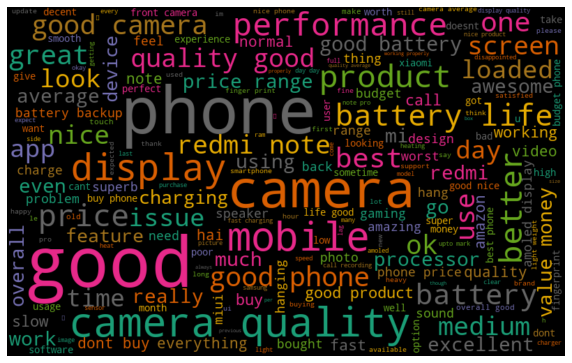

In [49]:
all_words = ' '.join([text for text in data_new['absolute_data'][data_new.sentiment == 'pos']])
generate_wordcloud(all_words)

### Most common words in negative reviews

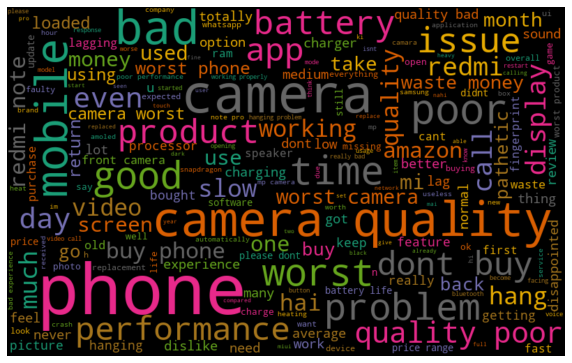

In [50]:
all_words = ' '.join([text for text in data_new['absolute_data'][data_new.sentiment == 'neg']])
generate_wordcloud(all_words)

### By performing emotional mining we can conclude that most of customer satisfied with this product 